<a href="https://colab.research.google.com/github/kollerbud/Intro_titanic/blob/master/Titanic_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# data trinity modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
%matplotlib inline

In [0]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


import xgboost as xgb

In [8]:
import os
import sys

print('pandas: {0}, numpy: {1}, matplotlib: {2}, seaborn: {3}, python: {4}'.format(pd.__version__, np.__version__, matplotlib.__version__, sns.__version__, sys.version))

pandas: 0.22.0, numpy: 1.14.6, matplotlib: 3.0.2, seaborn: 0.7.1, python: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [0]:

train_loc ='https://raw.githubusercontent.com/kollerbud/Intro_titanic/master/Titanic_train.csv'
test_loc ='https://raw.githubusercontent.com/kollerbud/Intro_titanic/master/Titanic_test.csv'

In [0]:
df_train =pd.read_csv(train_loc)
df_test =pd.read_csv(test_loc)

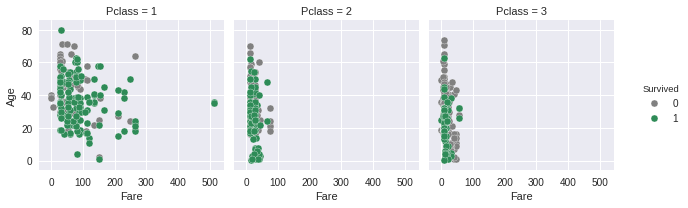

In [11]:
g =sns.FacetGrid(df_train, hue='Survived', col='Pclass', margin_titles=True, palette={1:'seagreen', 0:'gray'})
g =g.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


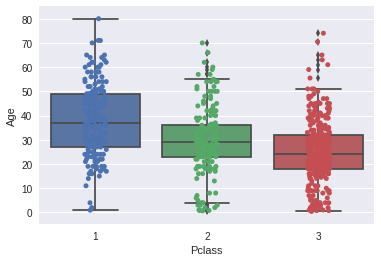

In [12]:
ax =sns.boxplot(x='Pclass', y='Age', data=df_train)
ax =sns.stripplot(x='Pclass', y='Age', data=df_train, jitter=True, edgecolor='gray')
plt.show()

<Figure size 432x288 with 0 Axes>

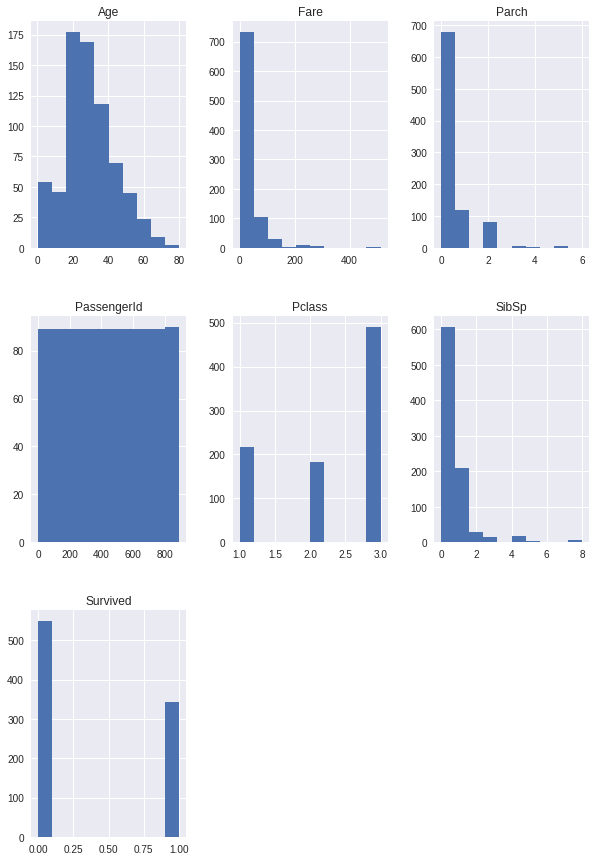

<Figure size 432x288 with 0 Axes>

In [13]:
df_train.hist(figsize=(10,15))
plt.figure()

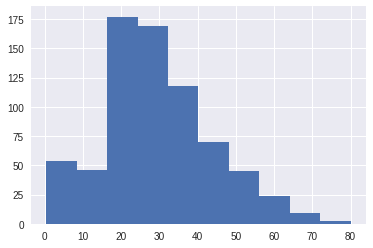

In [14]:
df_train['Age'].hist()

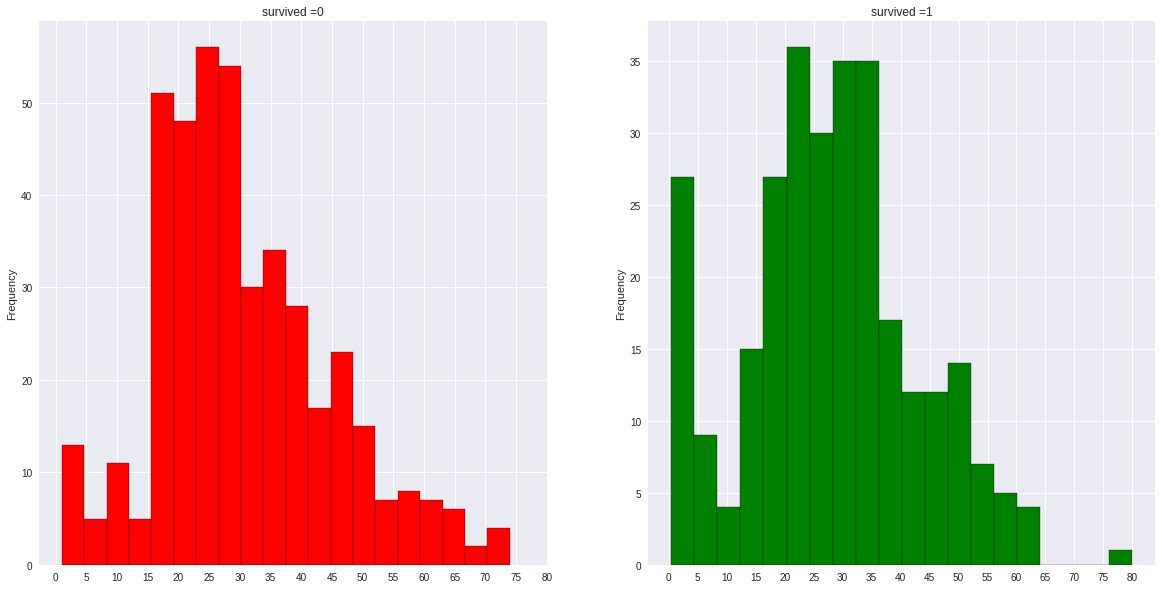

In [15]:
f, ax =plt.subplots(1,2, figsize=(20,10))
df_train[df_train['Survived']==0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('survived =0')
x1 =list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('survived =1')
x2 =list(range(0,85, 5))
ax[1].set_xticks(x2)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


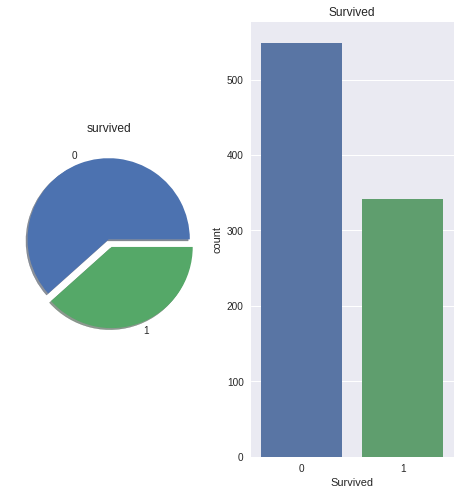

In [16]:
f, ax =plt.subplots(1,2, figsize=(8,8))
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], ax=ax[0], shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


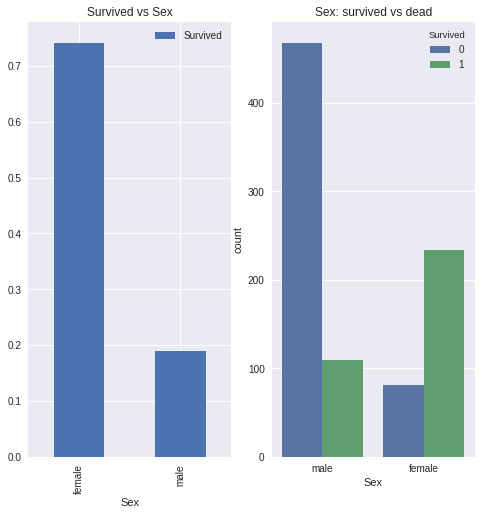

In [17]:
f, ax =plt.subplots(1,2,figsize=(8,8))
df_train[['Survived', 'Sex']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: survived vs dead')

plt.show()

<Figure size 432x288 with 0 Axes>

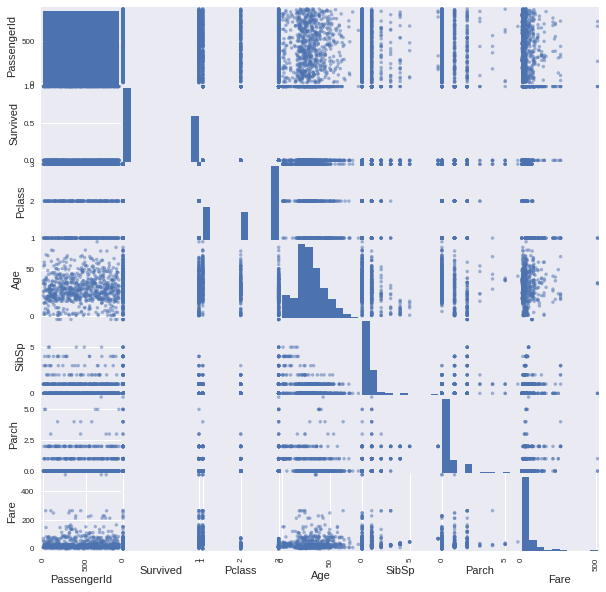

<Figure size 432x288 with 0 Axes>

In [18]:
pd.plotting.scatter_matrix(df_train, figsize=(10,10))
plt.figure()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


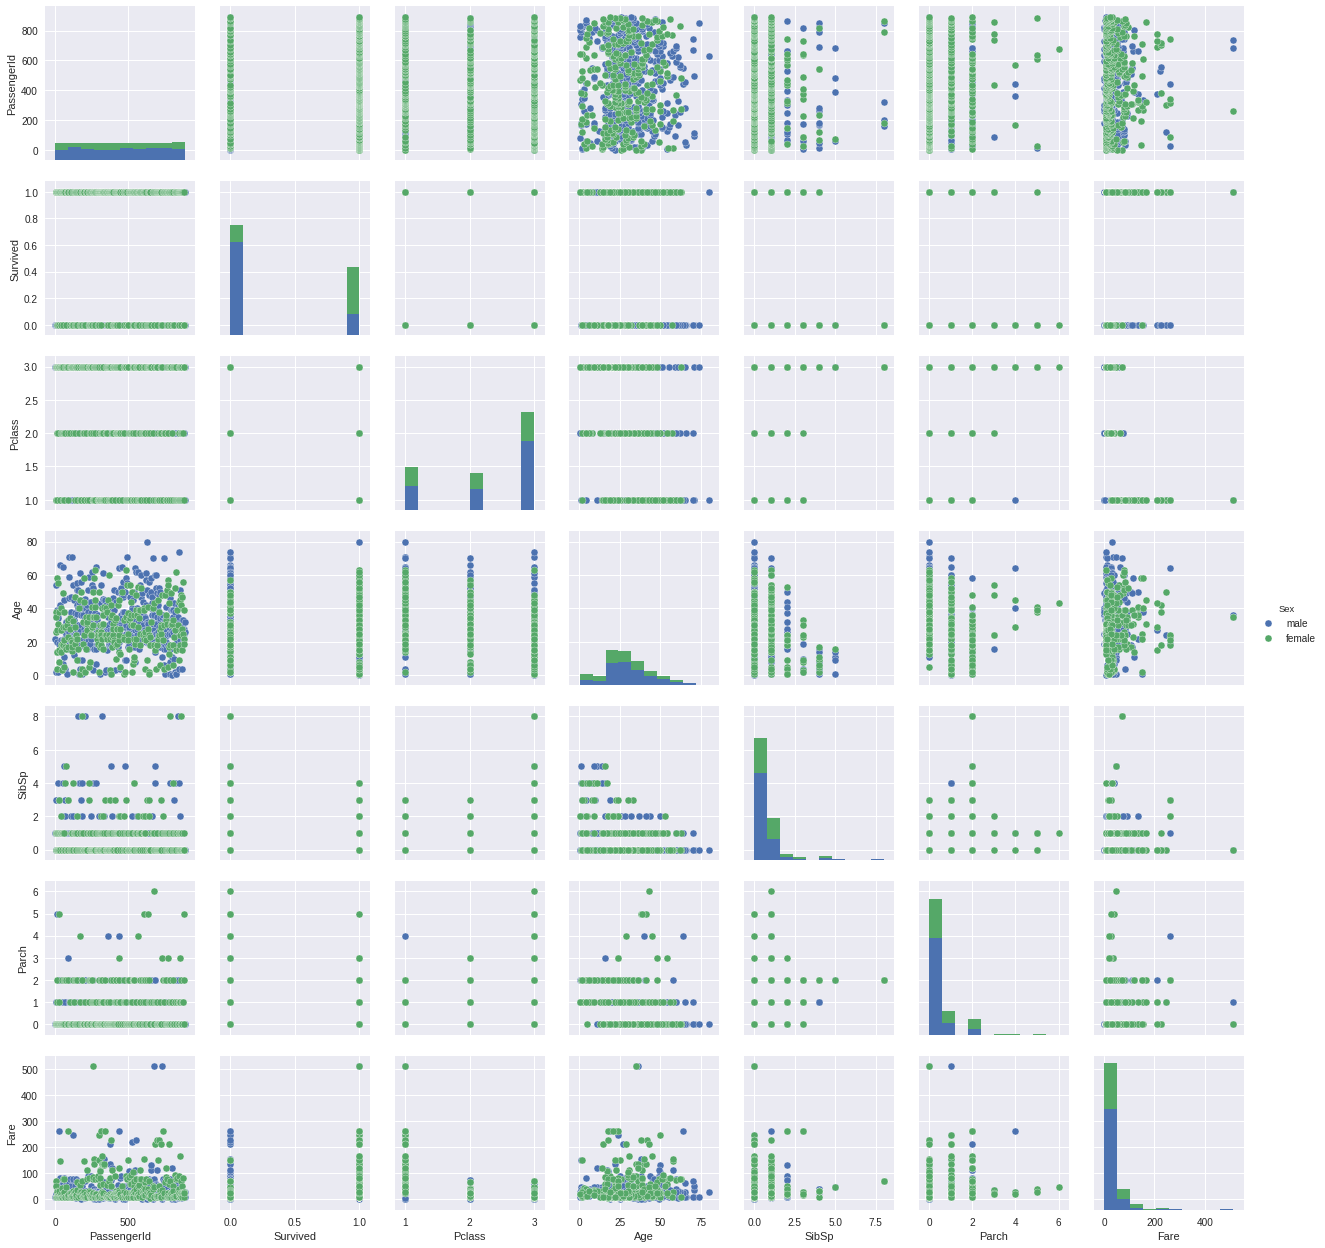

In [19]:
sns.pairplot(df_train, hue='Sex')

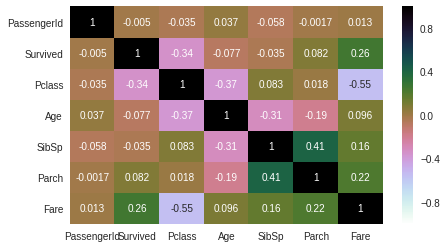

In [20]:
# heat map
plt.figure(figsize=(7,4))
sns.heatmap(df_train.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [21]:
corr1 =df_train.corr()
corr1.loc[:, 'Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

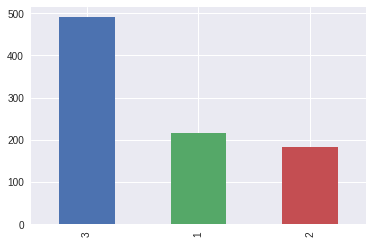

In [22]:
df_train['Pclass'].value_counts().plot(kind='bar')

In [23]:
df_train.shape

(891, 12)

In [24]:
df_train.size

10692

In [25]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [28]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [29]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q


In [30]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df_train.groupby(['Pclass']).agg({'Survived': 'sum',
                                'Age': 'mean',
                                 'Parch': 'mean'})

,Survived,Age,Parch
Pclass,,,
1,136,38.233441,0.356481
2,87,29.877630,0.380435
3,119,25.140620,0.393075


In [33]:
df_train.where(df_train['Age']==30).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_train[df_train['Age']<7.2].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S


In [35]:
x =df_train.loc[:, df_train.columns !='Survived']
y =df_train['Survived']
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [36]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
df_train.Age.sample(10)

889    26.0
654    18.0
171     4.0
194    44.0
299    50.0
352    15.0
34     28.0
31      NaN
490     NaN
40     40.0
Name: Age, dtype: float64

In [38]:
def simplify_ages(df):
    df.Age =df.Age.fillna(-0.5)
    bins =(-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names =['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories =pd.cut(df.Age, bins, labels=group_names)
    df.Age =categories
    
    return df

def simplify_cabins(df):
    df.Cabin =df.Cabin.fillna('N')
    df.Cabin =df.Cabin.apply(lambda x: x[0])
    
    return df

def simplify_fares(df):
    df.Fare =df.Fare.fillna(-0.5)
    bins =(-1, 0, 8, 15, 31, 1000)
    group_names =['Unknown', 'q_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories =pd.cut(df.Fare, bins, labels=group_names)
    df.Fare =categories
    
    return df

def format_name(df):
    df['Lname'] =df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] =df.Name.apply(lambda x: x.split(' ')[1])

    return df

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def run_function(df):
    df =simplify_ages(df)
    df =simplify_cabins(df)
    df =simplify_fares(df)
    df =format_name(df)
    df =drop_features(df)
    
    return df

df_train =run_function(df_train)
df_test =run_function(df_test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,q_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,q_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


In [39]:
df_train.Age.describe()

count             891
unique              8
top       Young Adult
freq              196
Name: Age, dtype: object

In [0]:
def encode_features (df_train, df_test):
    features =['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    combine =pd.concat([df_train[features], df_test[features]])
    
    for f in features:
        le =preprocessing.LabelEncoder()
        le =le.fit(combine[f])
        df_train[f] =le.transform(df_train[f])
        df_test[f] =le.transform(df_test[f])
        
    return df_train, df_test


    

In [41]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Lname', 'NamePrefix'],
      dtype='object')

In [0]:
df_train, df_test =encode_features(df_train, df_test)

In [43]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,4,7,100,19
1,2,1,1,0,0,1,0,2,2,182,20
2,3,1,3,0,7,0,0,4,7,329,16
3,4,1,1,0,7,1,0,2,2,267,20
4,5,0,3,1,7,0,0,0,7,15,19


In [0]:
x =df_train.drop(['Survived', 'PassengerId'], axis=1)
y =df_train['Survived']

In [0]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=1)

In [46]:
#XGBoost

xgboost =xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)

xgb_pred =xgboost.predict(x_test)
xgb_score =accuracy_score(y_test, xgb_pred)
print(xgb_score)


0.7873134328358209
